In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [3]:
PATH = Path('../data')
DATA_PATH = PATH/'qol'
FILE = '2019-10-02-merge-cluster-covariates-demographics.csv'

In [4]:
data = pd.read_csv(DATA_PATH/FILE)
data.shape

(28524, 39)

In [5]:
data.head()

,cluster,state,region,source,uor,lat,lng,wealth,num_rooms,num_mosquito_nets,water_src,water_treatment,toilet_type,floor,wall,roof,cooking_fuel,electricity,radio,television,refrigirator,bicycle,car_truck,telephone,mobile,agriculture_land,livestock,bank_account,net_used,education,Aridity_2015,Drought_Episodes,Enhanced_Vegetation_Index_2015,Irrigation,Wet_Days_2015,BUILT_Population_2014,Global_Human_Footprint,Nightlights_Composite,UN_Population_Density_2015
0,310502,Tamil Nadu,Thiruvallur,GPS,R,13.320202,80.010414,c:middle,2,0,public tap/standpipe,no,no facility/bush/field,cement,cement blocks,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.045455,0.863636,0.318182,0.500000,0.000000,0.0,0.909091,0.363636,0.272727,0.954545,0.000000,secondary,15.174576,5.0,2807.666667,37.346310,6.005833,0.012774,32.888889,0.828298,462.148768
1,310190,Tamil Nadu,Thiruvallur,GPS,R,13.118380,79.803917,c:middle,1,0,piped to yard/plot,no,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,biogas,1.000000,0.000000,1.000000,0.363636,0.772727,0.045455,0.0,1.000000,0.363636,0.363636,1.000000,0.000000,secondary,16.771959,5.0,2951.750000,26.850726,5.442500,0.020493,39.093333,0.670533,645.543333
2,310070,Tamil Nadu,Thiruvallur,GPS,R,13.147002,79.804755,c:middle,2,0,public tap/standpipe,yes,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",0.909091,0.000000,0.909091,0.227273,0.727273,0.000000,0.0,0.863636,0.454545,0.727273,0.954545,0.000000,secondary,16.771959,5.0,2897.000000,24.897802,5.442500,0.020496,37.667546,0.604633,640.212813
3,310716,Tamil Nadu,Thiruvallur,GPS,R,13.263585,80.188453,c:middle,1,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.136364,0.954545,0.454545,0.590909,0.000000,0.0,0.909091,0.045455,0.500000,0.954545,0.000000,secondary,15.174576,10.0,2774.583333,46.309860,6.005833,0.052614,48.724138,2.940362,873.909888
4,310592,Tamil Nadu,Thiruvallur,GPS,R,13.261215,80.222348,c:middle,2,0,piped into dwelling,no,no facility/bush/field,cement,cement blocks,asbestos sheets,"lpg, natural gas",1.000000,0.136364,1.000000,0.500000,0.681818,0.000000,0.0,1.000000,0.045455,0.681818,0.863636,0.045455,secondary,15.174576,10.0,2767.545455,34.305649,6.005833,0.081102,56.188830,4.134337,973.932858


In [6]:
data.describe()

,cluster,lat,lng,num_rooms,num_mosquito_nets,electricity,radio,television,refrigirator,bicycle,car_truck,telephone,mobile,agriculture_land,livestock,bank_account,net_used,Aridity_2015,Drought_Episodes,Enhanced_Vegetation_Index_2015,Irrigation,Wet_Days_2015,BUILT_Population_2014,Global_Human_Footprint,Nightlights_Composite,UN_Population_Density_2015
count,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,28524.000000,27791.000000,28166.000000,28228.000000,28237.000000,27791.000000,28393.000000,28342.000000,28393.000000,28385.000000
mean,204144.124912,23.564903,81.012752,1.699095,0.621932,0.881526,0.094148,0.623323,0.280511,0.346300,0.068250,0.031129,0.896486,0.444651,0.499578,0.891774,0.372319,29.294939,6.272811,2890.501771,25.905120,5.156611,0.093922,45.180655,3.962838,1235.154076
std,102851.783739,5.694239,8.386615,0.570283,1.029198,0.206977,0.139988,0.302316,0.295225,0.237327,0.117015,0.078303,0.122229,0.292638,0.311542,0.130534,0.358582,20.479889,2.580428,763.065058,28.847815,2.188514,0.207983,17.961378,9.385251,3664.137831
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.965964,1.000000,0.000000,0.000000,0.772500,0.000000,0.942857,0.000000,0.000000
25%,120894.750000,21.194651,76.536842,1.000000,0.000000,0.863636,0.000000,0.380952,0.045455,0.150000,0.000000,0.000000,0.857143,0.181818,0.210526,0.857143,0.047619,14.708818,5.000000,2444.375000,2.596518,3.487500,0.000737,34.016321,0.216221,237.785146
50%,200508.500000,24.760772,79.490356,2.000000,0.000000,1.000000,0.047619,0.700000,0.157895,0.318182,0.000000,0.000000,0.950000,0.454545,0.545455,0.950000,0.238095,22.506382,7.000000,2818.386905,13.369623,4.871666,0.004641,40.303880,0.549572,471.385994
75%,291722.250000,27.103298,85.518291,2.000000,1.000000,1.000000,0.136364,0.900000,0.476190,0.500000,0.090909,0.045455,1.000000,0.681818,0.772727,1.000000,0.681818,35.641159,8.000000,3220.000000,42.094093,6.520000,0.044649,52.260098,2.219697,954.873995
max,360482.000000,34.847342,97.050089,5.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,136.132309,10.000000,5514.000000,100.000000,13.118333,0.996090,100.000000,106.167635,63807.058333


In [7]:
data.describe(include=np.object)

,state,region,source,uor,wealth,water_src,water_treatment,toilet_type,floor,wall,roof,cooking_fuel,education
count,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524,28524
unique,36,634,3,2,5,15,2,12,13,17,20,10,4
top,Uttar Pradesh,Meerut,GPS,R,b:poorer,tube well or borehole,no,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,wood,secondary
freq,3638,112,25009,20044,7576,11900,17599,12166,12955,10043,11735,14719,23853


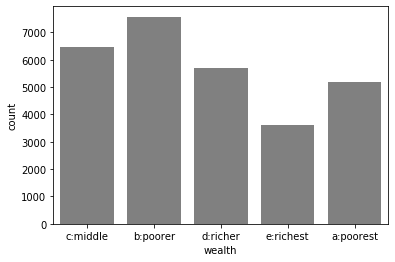

In [8]:
sns.countplot(x='wealth', data=data, color='gray')

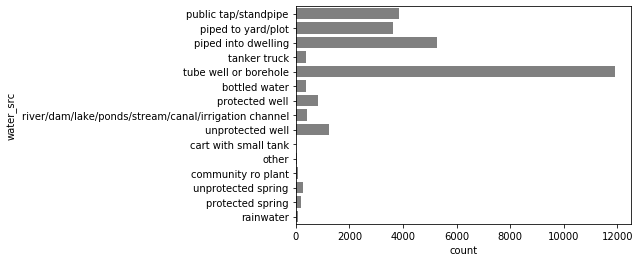

In [9]:
sns.countplot(y='water_src', data=data, color='gray')

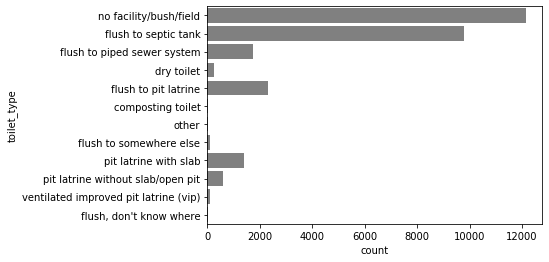

In [10]:
sns.countplot(y='toilet_type', data=data, color='gray')

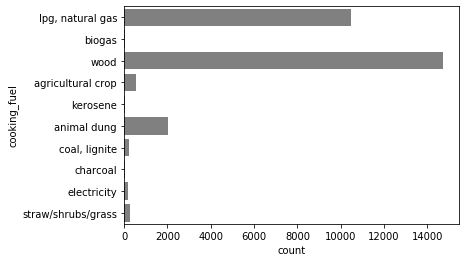

In [11]:
sns.countplot(y='cooking_fuel', data=data, color='gray')

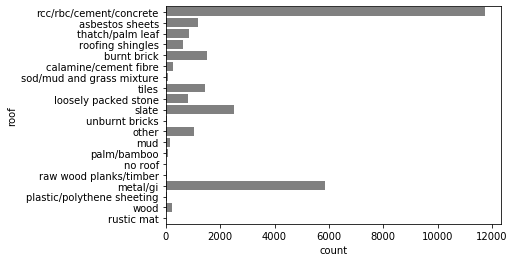

In [12]:
sns.countplot(y='roof', data=data, color='gray')

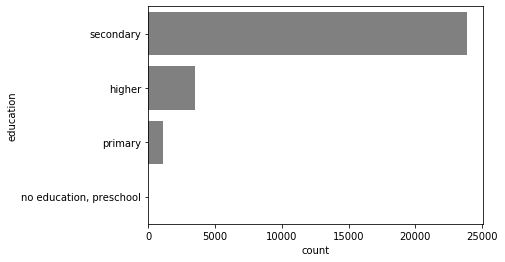

In [13]:
sns.countplot(y='education', data=data, color='gray')

In [15]:
data.columns.to_list()

['cluster',
 'state',
 'region',
 'source',
 'uor',
 'lat',
 'lng',
 'wealth',
 'num_rooms',
 'num_mosquito_nets',
 'water_src',
 'water_treatment',
 'toilet_type',
 'floor',
 'wall',
 'roof',
 'cooking_fuel',
 'electricity',
 'radio',
 'television',
 'refrigirator',
 'bicycle',
 'car_truck',
 'telephone',
 'mobile',
 'agriculture_land',
 'livestock',
 'bank_account',
 'net_used',
 'education',
 'Aridity_2015',
 'Drought_Episodes',
 'Enhanced_Vegetation_Index_2015',
 'Irrigation',
 'Wet_Days_2015',
 'BUILT_Population_2014',
 'Global_Human_Footprint',
 'Nightlights_Composite',
 'UN_Population_Density_2015']

In [16]:
data.head()

,cluster,state,region,source,uor,lat,lng,wealth,num_rooms,num_mosquito_nets,water_src,water_treatment,toilet_type,floor,wall,roof,cooking_fuel,electricity,radio,television,refrigirator,bicycle,car_truck,telephone,mobile,agriculture_land,livestock,bank_account,net_used,education,Aridity_2015,Drought_Episodes,Enhanced_Vegetation_Index_2015,Irrigation,Wet_Days_2015,BUILT_Population_2014,Global_Human_Footprint,Nightlights_Composite,UN_Population_Density_2015
0,310502,Tamil Nadu,Thiruvallur,GPS,R,13.320202,80.010414,c:middle,2,0,public tap/standpipe,no,no facility/bush/field,cement,cement blocks,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.045455,0.863636,0.318182,0.500000,0.000000,0.0,0.909091,0.363636,0.272727,0.954545,0.000000,secondary,15.174576,5.0,2807.666667,37.346310,6.005833,0.012774,32.888889,0.828298,462.148768
1,310190,Tamil Nadu,Thiruvallur,GPS,R,13.118380,79.803917,c:middle,1,0,piped to yard/plot,no,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,biogas,1.000000,0.000000,1.000000,0.363636,0.772727,0.045455,0.0,1.000000,0.363636,0.363636,1.000000,0.000000,secondary,16.771959,5.0,2951.750000,26.850726,5.442500,0.020493,39.093333,0.670533,645.543333
2,310070,Tamil Nadu,Thiruvallur,GPS,R,13.147002,79.804755,c:middle,2,0,public tap/standpipe,yes,no facility/bush/field,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",0.909091,0.000000,0.909091,0.227273,0.727273,0.000000,0.0,0.863636,0.454545,0.727273,0.954545,0.000000,secondary,16.771959,5.0,2897.000000,24.897802,5.442500,0.020496,37.667546,0.604633,640.212813
3,310716,Tamil Nadu,Thiruvallur,GPS,R,13.263585,80.188453,c:middle,1,0,public tap/standpipe,no,flush to septic tank,cement,cement/concrete,rcc/rbc/cement/concrete,"lpg, natural gas",1.000000,0.136364,0.954545,0.454545,0.590909,0.000000,0.0,0.909091,0.045455,0.500000,0.954545,0.000000,secondary,15.174576,10.0,2774.583333,46.309860,6.005833,0.052614,48.724138,2.940362,873.909888
4,310592,Tamil Nadu,Thiruvallur,GPS,R,13.261215,80.222348,c:middle,2,0,piped into dwelling,no,no facility/bush/field,cement,cement blocks,asbestos sheets,"lpg, natural gas",1.000000,0.136364,1.000000,0.500000,0.681818,0.000000,0.0,1.000000,0.045455,0.681818,0.863636,0.045455,secondary,15.174576,10.0,2767.545455,34.305649,6.005833,0.081102,56.188830,4.134337,973.932858
